# AS4PA First set of exercises:

Gaudio Raffaele (2057974)

Delivery: 10/04/2022

In [1]:
library("ggplot2")
library("dplyr")


Caricamento pacchetto: ‘dplyr’


I seguenti oggetti sono mascherati da ‘package:stats’:

    filter, lag


I seguenti oggetti sono mascherati da ‘package:base’:

    intersect, setdiff, setequal, union




### Exercise 1 - Vector and Dataframe

The following table gives the volume, area, length and maximum and mean depths of some Scottish lakes[1]. Create vectors, holding the lake’s name and all the parameters and build a dataframe called scottish.lakes from the vectors.

a) Evaluate the highest and lowest volume and area lake.

b) Order the frame with respect to the area and determine two largest area lakes.

c) By summing up the areas occupied by the lakes, determine the area of Scotland covered by water.

In [2]:
Scottish_Lakes<-read.csv2("Lake_Data.csv",header=T,dec=",") #importing data from a csv file previously created
                                                            #semicolon separated data -> .csv2
Scottish_Lakes

Lake_Name,Volume,Area,Length,Max_Depth,Mean_Depth
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Ness,7.45,56.0,39.0,230,132.0
Lomond,2.60,71.0,36.0,190,37.0
Morar,2.30,27.0,18.8,310,87.0
Tay,1.60,26.4,23.0,150,60.6
Awe,1.20,39.0,41.0,94,32.0
Maree,1.09,28.6,20.0,114,38.0
Ericht,1.08,18.6,23.0,156,57.6
Lochy,1.07,16.0,16.0,162,70.0
Rannoch,0.97,19.0,15.7,134,51.0


In [3]:
# a) Evaluate the highest and lowest volume and area lake:

max_vol<-apply(Scottish_Lakes["Volume"],MARGIN=2, FUN=max) #in this way i find the max/min value in a coloumn
min_vol<-apply(Scottish_Lakes["Volume"],MARGIN=2, FUN=min)

print("Maximum volume [km^3]:")
max_vol                                                      #print only the max/min value (method 1)
max(Scottish_Lakes["Volume"])                                #print only the max/min value (method 2)
Scottish_Lakes[which(Scottish_Lakes["Volume"]==max_vol),]    #print the full row of the max/min value

print("Minimim volume [km^3]:")
min_vol
Scottish_Lakes[which(Scottish_Lakes["Volume"]==min_vol),]

max_area<-apply(Scottish_Lakes["Area"],MARGIN=2, FUN=max)
min_area<-apply(Scottish_Lakes["Area"],MARGIN=2, FUN=min)

print("Maximum area [km^2]:")
max_area
Scottish_Lakes[which(Scottish_Lakes["Area"]==max_area),]

print("Minimum area [km^2]:")
min_area
Scottish_Lakes[which(Scottish_Lakes["Area"]==min_area),]


[1] "Maximum volume [km^3]:"


Volume 
  7.45

[1] 7.45

,Lake_Name,Volume,Area,Length,Max_Depth,Mean_Depth
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,Ness,7.45,56,39,230,132


[1] "Minimim volume [km^3]:"


Volume 
  0.35

,Lake_Name,Volume,Area,Length,Max_Depth,Mean_Depth
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
13,Shin,0.35,22.5,27.8,49,15.5


[1] "Maximum area [km^2]:"


Area 
  71

,Lake_Name,Volume,Area,Length,Max_Depth,Mean_Depth
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2,Lomond,2.6,71,36,190,37


[1] "Minimum area [km^2]:"


Area 
12.4

,Lake_Name,Volume,Area,Length,Max_Depth,Mean_Depth
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
11,Katrine,0.77,12.4,12.9,151,43.4


In [4]:
# b) Order the frame with respect to the area and determine two largest area lakes:

sort_data<-Scottish_Lakes[order(-Scottish_Lakes$Area),] #the "-" allows decrescent mode

head(sort_data,2)

,Lake_Name,Volume,Area,Length,Max_Depth,Mean_Depth
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2,Lomond,2.60,71,36,190,37
1,Ness,7.45,56,39,230,132


In [5]:
# c) By summing up the areas occupied by the lakes, determine the area of Scotland covered by water:

covered_area<-apply(X=Scottish_Lakes["Area"],MARGIN=2, FUN=sum) #sum over the column

print("Area of Scotland covered by lakes [km^2]:") 
covered_area

[1] "Area of Scotland covered by lakes [km^2]:"


Area 
 372

### Exercise 2 - Crude Oli Production
The following CSV file https://drive.google.com/file/d/13WkinYhJNSr_XCldb3wpZOI0fgjer7Iw/view contains data on crude oil prices from 1861 to 2020, measured in US dollars per barrel [2].



a) Write R code that is able to read the file and import it in a data frame structure. (Hint: before loading the file, open it with a text editor and check its structure).

b) Produce a plot with the Oil price as a function of the year.

c) Which is the highest price in history? When did it occur?

d) Plot the derivative of the curve, simply evaluated with the finite difference formula (forward deriva- tive):
$$
\frac{\partial price}{\partial year}=price_{j+1}-price_{j}
$$

In [6]:
# a) Write R code that is able to read the file and import it in a data frame structure:

Crude_Oil<-read.csv("crude-oil-prices.csv", header=T) #comma separated data -> .csv

colnames(Crude_Oil)[4] <- "Price" # I changed the name of the 4th column for added convenience

head(Crude_Oil,5)
tail(Crude_Oil,5)

,Entity,Code,Year,Price
,<chr>,<chr>,<int>,<dbl>
1,World,OWID_WRL,1861,0.49
2,World,OWID_WRL,1862,1.05
3,World,OWID_WRL,1863,3.15
4,World,OWID_WRL,1864,8.06
5,World,OWID_WRL,1865,6.59


,Entity,Code,Year,Price
,<chr>,<chr>,<int>,<dbl>
156,World,OWID_WRL,2016,43.73417
157,World,OWID_WRL,2017,54.19244
158,World,OWID_WRL,2018,71.31006
159,World,OWID_WRL,2019,64.21057
160,World,OWID_WRL,2020,41.83835


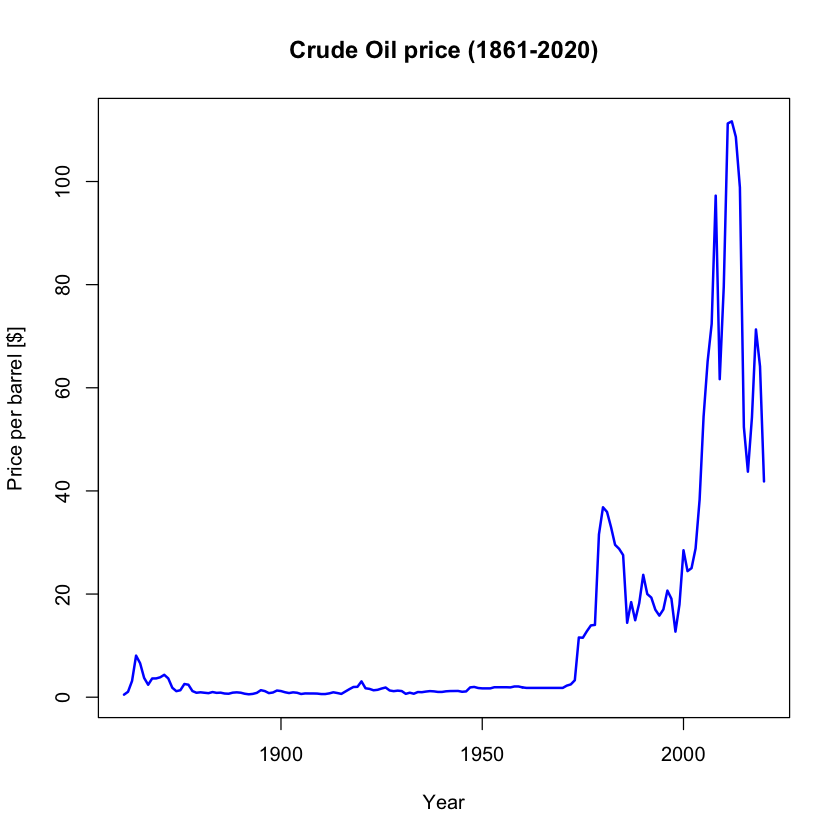

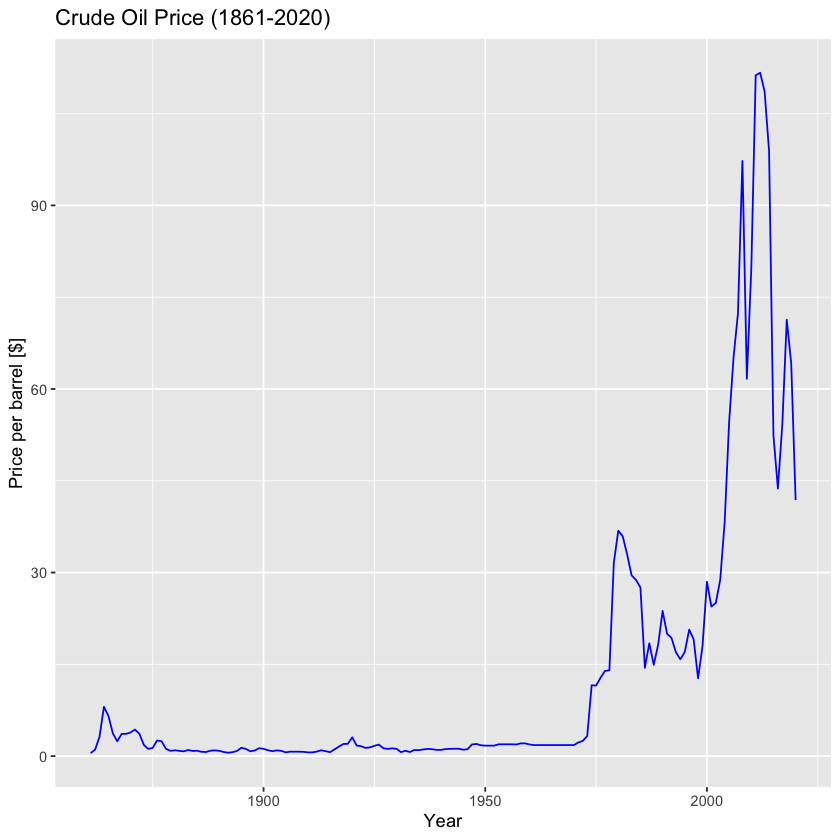

In [7]:
# b) Produce a plot with the Oil price as a function of the year:

Year<-Crude_Oil[,"Year"]
Price<-Crude_Oil[,"Price"]

#try "plot"
plot(Year, Price, type="l", col="blue", lwd = 2, main="Crude Oil price (1861-2020)", ylab="Price per barrel [$]")

#try "ggplot"
ggplot(Crude_Oil,aes(x=Year, y=Price)) + 
    geom_line(color="blue")+
    labs(title="Crude Oil Price (1861-2020)",y="Price per barrel [$]")

In [8]:
# c) Which is the highest price in history? When did it occur?

max_price<-apply(Crude_Oil["Price"],MARGIN=2, FUN=max)

print("Highest crude oil price in history [$]:")
Crude_Oil[which(Crude_Oil["Price"]==max_price),] 

[1] "Highest crude oil price in history [$]:"


,Entity,Code,Year,Price
,<chr>,<chr>,<int>,<dbl>
152,World,OWID_WRL,2012,111.6697


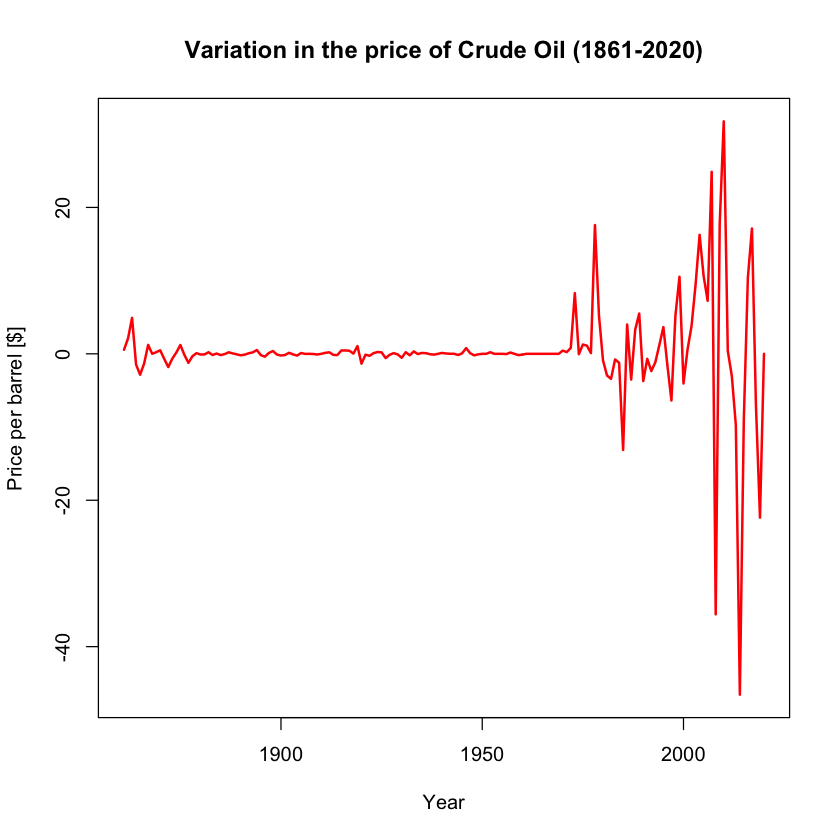

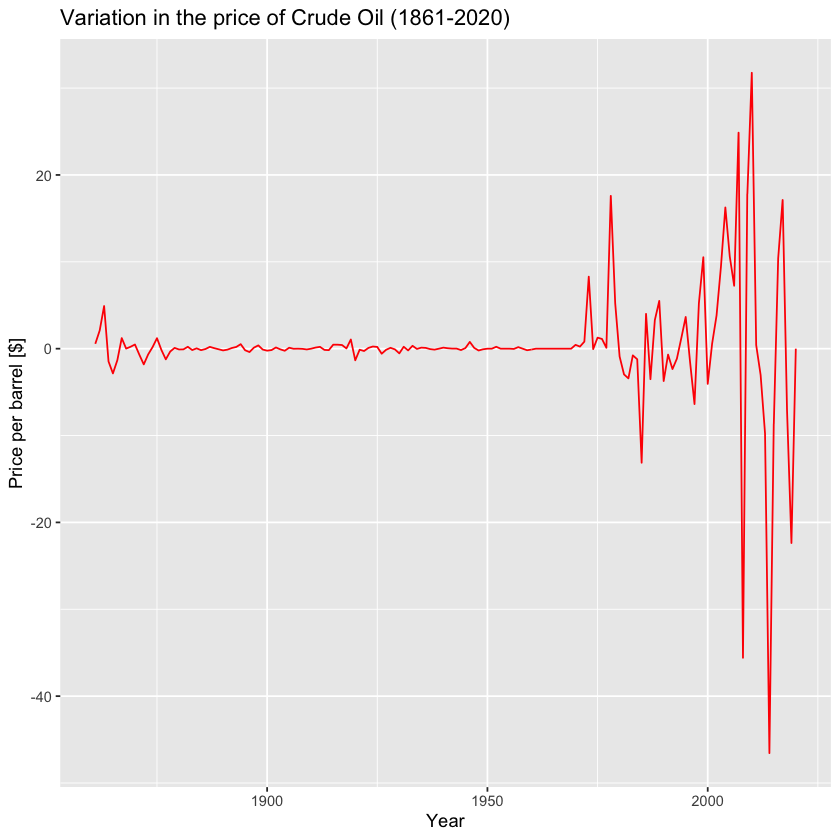

In [9]:
# d) Plot the derivative of the curve:

Fluctuation <- vector(length=160) #initialize the derivatives vector

for( i in 1:159){
    Fluctuation[i]=Price[i+1]-Price[i]
    }

plot(Year,Fluctuation,type="l",lwd = 2,col="red",main="Variation in the price of Crude Oil (1861-2020)",ylab="Price per barrel [$]")


#in order to use ggplot i have to add the "Fluctuations" column to the dataframe
Crude_Oil$Fluctuations<-Fluctuation

ggplot(Crude_Oil, aes(Year,Fluctuations))+
    geom_line(color="red")+
    labs(title="Variation in the price of Crude Oil (1861-2020)",y="Price per barrel [$]")

### Exercise 3 - World Coal Production
The following CSV file https://drive.google.com/file/d/1U1hK5o_d3vl8twwGaRJNcDJ79O9I5zJ1/view?usp=sharing contains data on the coal production (in TW · hour) for several countries in the World [3].

a) Write R code that is able to read the file and import it in a tibble [4] structure.

b) Count the number of countries available in the file and produce a barplot with the number of entries for each country.

For the following items select only the years ≥ 1970:

c) selecting only the year after 1970, determine the total integrated production for each country and
print the top 5 Countries with highest coal productions.

d) For the 5 top Countries, create a plot of production as a function of time.

e) Generate a plot with the cumulative sum of the World’s coal production over the years.

In [10]:
# a) Write R code that is able to read the file and import it in a tibble structure:

Coal<-read.csv("coal-production-by-country.csv",header=T)
colnames(Coal)[4]<-"Production"

head(Coal,5)
tail(Coal,5)

,Entity,Code,Year,Production
,<chr>,<chr>,<int>,<dbl>
1,Afghanistan,AFG,1900,0
2,Afghanistan,AFG,1901,0
3,Afghanistan,AFG,1902,0
4,Afghanistan,AFG,1903,0
5,Afghanistan,AFG,1904,0


,Entity,Code,Year,Production
,<chr>,<chr>,<int>,<dbl>
11524,Zimbabwe,ZWE,2015,32.517
11525,Zimbabwe,ZWE,2016,20.260
11526,Zimbabwe,ZWE,2017,21.957
11527,Zimbabwe,ZWE,2018,26.910
11528,Zimbabwe,ZWE,2019,17.487


[1] "Number of countries available in the file:"


[1] 177

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


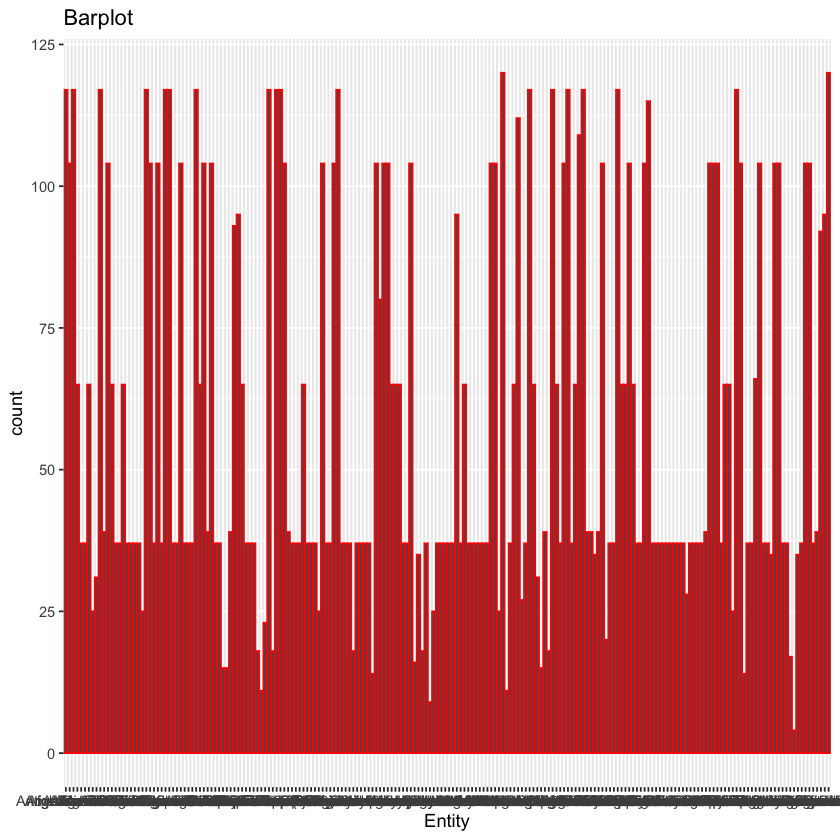

In [11]:
# b) Count the number of countries available in the file and produce a barplot with the number of entries for each country:

print("Number of countries available in the file:")
length(unique(Coal[,2]))

ggplot(Coal, aes(Entity))+
    geom_histogram(stat="count", color="red")+
    labs(title="Barplot")

In [12]:
# For the following items select only the years ≥ 1970

restriction<-subset(Coal, Year>=1970)
head(restriction,5)
tail(restriction,5)

,Entity,Code,Year,Production
,<chr>,<chr>,<int>,<dbl>
71,Afghanistan,AFG,1970,1.335
72,Afghanistan,AFG,1971,1.099
73,Afghanistan,AFG,1972,0.578
74,Afghanistan,AFG,1973,0.952
75,Afghanistan,AFG,1974,0.936


,Entity,Code,Year,Production
,<chr>,<chr>,<int>,<dbl>
11524,Zimbabwe,ZWE,2015,32.517
11525,Zimbabwe,ZWE,2016,20.260
11526,Zimbabwe,ZWE,2017,21.957
11527,Zimbabwe,ZWE,2018,26.910
11528,Zimbabwe,ZWE,2019,17.487


In [13]:
# c) Determine the total integrated production for each country and print the top 5 Countries with highest coal productions:

total_coal<-aggregate(restriction$Production, by=list(restriction$Entity), FUN=sum) #sum over production gouped by entity

sort_total_coal<-total_coal[order(-total_coal$x),]                                  #order it in decrescent way

colnames(sort_total_coal)[2]<-"Total_Production"
colnames(sort_total_coal)[1]<-"Entity"

#now we can select only the top 5 country (avoid "World", continents, organizations...)
head(sort_total_coal,16)                                                             

,Entity,Total_Production
,<chr>,<dbl>
176,World,1260113.24
9,Asia Pacific,690240.47
8,Asia and Oceania,685960.04
32,China,459564.65
120,OECD,438441.38
117,North America,244443.42
166,United States,226068.84
51,Eurasia,161580.48
50,EU-28,150743.35


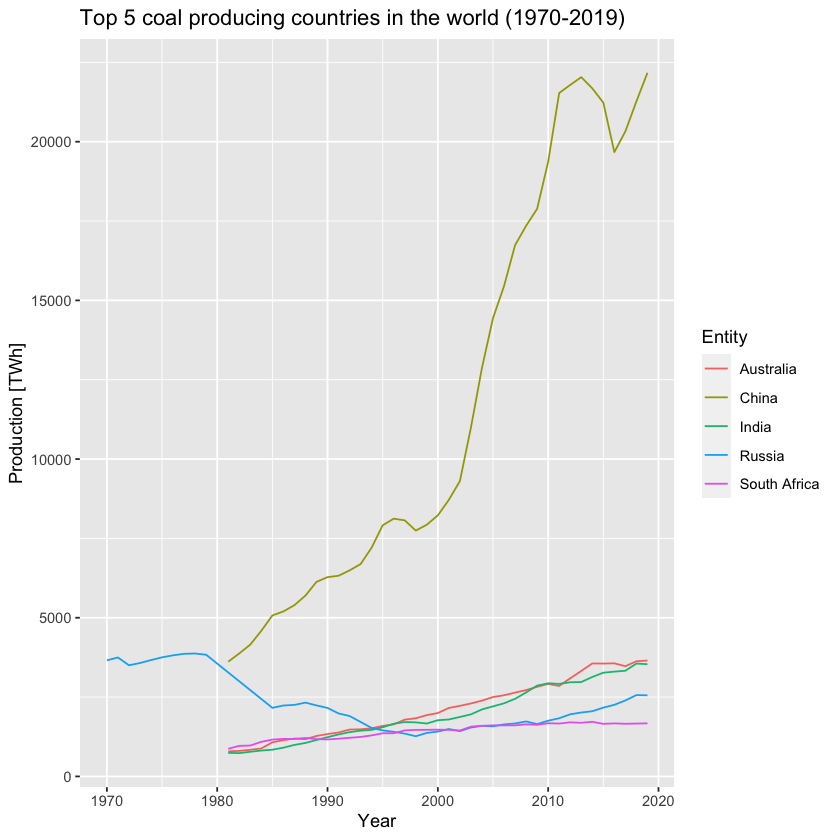

In [14]:
top5<-c("China","Russia","Australia","India","South Africa")
top_coal<-filter(restriction,Entity %in% top5)

top_coal %>% group_by(Entity) %>% 
    ggplot()+geom_line(aes(Year, Production, group=Entity, color=Entity))+
    labs(title="Top 5 coal producing countries in the world (1970-2019)",y="Production [TWh]")

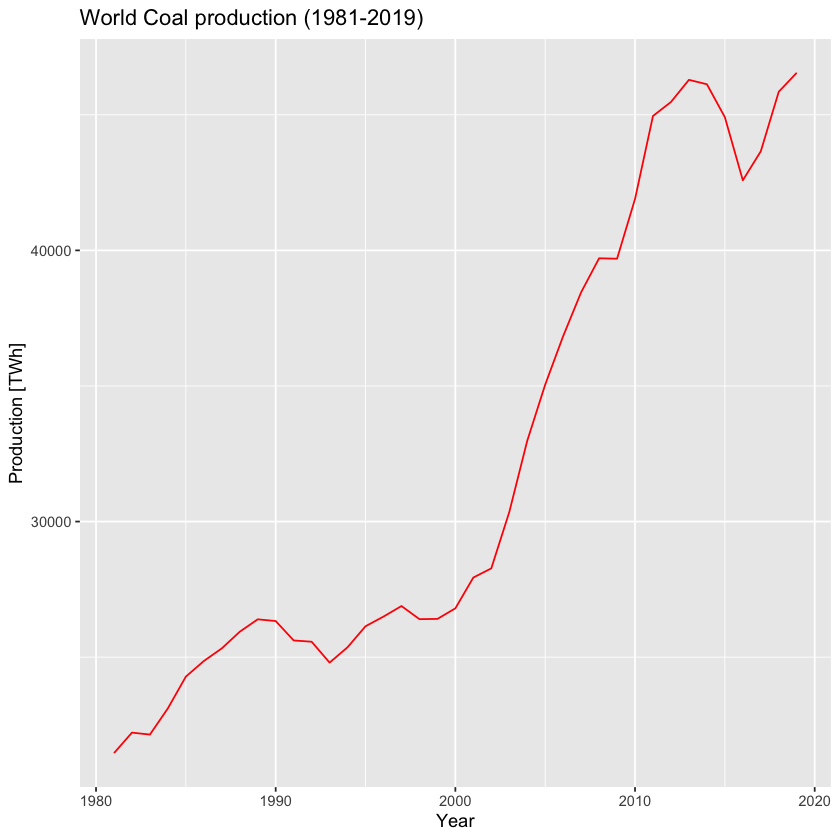

In [15]:
# e) Generate a plot with the cumulative sum of the World’s coal production over the years:

world_coal<-filter(restriction, Entity=="World")

ggplot(world_coal, aes(Year,Production))+
    geom_line(color="red")+
    labs(title="World Coal production (1981-2019)",y="Production [TWh]")


### Exercise 4 - Covid19 Vaccine Data
Data on Covid-19 vaccine can be found on [5].

The file vaccinationsby-manufacturer.csv, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations-by-manufacturer.csv contains a summary on the vaccination data grouped by Vaccine type and Country.

a) Filter() the original tibble by selecting the following countries: Italy.

b) Plot the number of vaccines given as a function of time for the different vaccine manufacturer.

c) From the same tibble plot the total number of vaccines shot per day in Italy.

d) Do the same exercise for the following countries: Germany and United States of America.

The file vaccinations.csv, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations.csv) contains country-by-country data on global COVID-19 vaccinations. The dataset includes some subnational locations (England, Northern Ireland, Scot- land, Wales, ...) and international aggregates (World, continents, European Union ldots). They can be identified by their iso code that starts with OWID

e) Selecting all the European countries in the tibble, plot the number of daily vaccinations per million as a function of date.

f) Study the data structure and produce few relevant plots of your taste.




In [16]:
Vax<-read.csv("vaccinations-by-manufacturer.csv",header=T)
head(Vax,10)

#as we can see below, the "date" column is not a Date type...

,location,date,vaccine,total_vaccinations
,<chr>,<chr>,<chr>,<int>
1,Argentina,2020-12-29,Moderna,2
2,Argentina,2020-12-29,Oxford/AstraZeneca,3
3,Argentina,2020-12-29,Sinopharm/Beijing,1
4,Argentina,2020-12-29,Sputnik V,20481
5,Argentina,2020-12-30,Moderna,2
6,Argentina,2020-12-30,Oxford/AstraZeneca,3
7,Argentina,2020-12-30,Sinopharm/Beijing,1
8,Argentina,2020-12-30,Sputnik V,40583
9,Argentina,2020-12-31,Moderna,2


In [17]:
#... here we convert the date column in the right format in order to perform plots

Vax<-mutate(Vax, date=as.Date(date, format="%Y-%m-%d")) 

In [18]:
# a) Filter() the original tibble by selecting the following countries: Italy.

vax_ita<-subset(Vax, location=="Italy")
head(vax_ita,10)

,location,date,vaccine,total_vaccinations
,<chr>,<date>,<chr>,<int>
14733,Italy,2020-12-27,Moderna,2
14734,Italy,2020-12-27,Pfizer/BioNTech,7347
14735,Italy,2020-12-28,Moderna,6
14736,Italy,2020-12-28,Pfizer/BioNTech,8848
14737,Italy,2020-12-29,Moderna,11
14738,Italy,2020-12-29,Pfizer/BioNTech,9942
14739,Italy,2020-12-30,Moderna,22
14740,Italy,2020-12-30,Pfizer/BioNTech,14816
14741,Italy,2020-12-31,Pfizer/BioNTech,40763


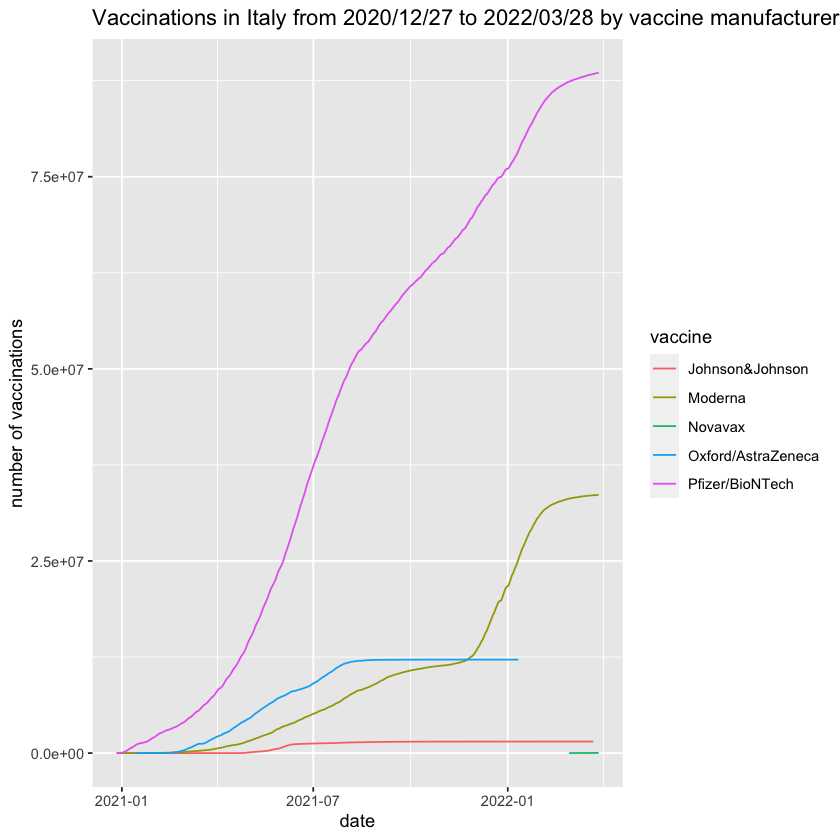

In [19]:
# b) Plot the number of vaccines given as a function of time for the different vaccine manufacturer:

vax_ita %>% group_by(vaccine) %>% 
    ggplot()+geom_line(aes(date, total_vaccinations, group=vaccine, color=vaccine))+
    labs(title="Vaccinations in Italy from 2020/12/27 to 2022/03/28 by vaccine manufacturer",y="number of vaccinations")

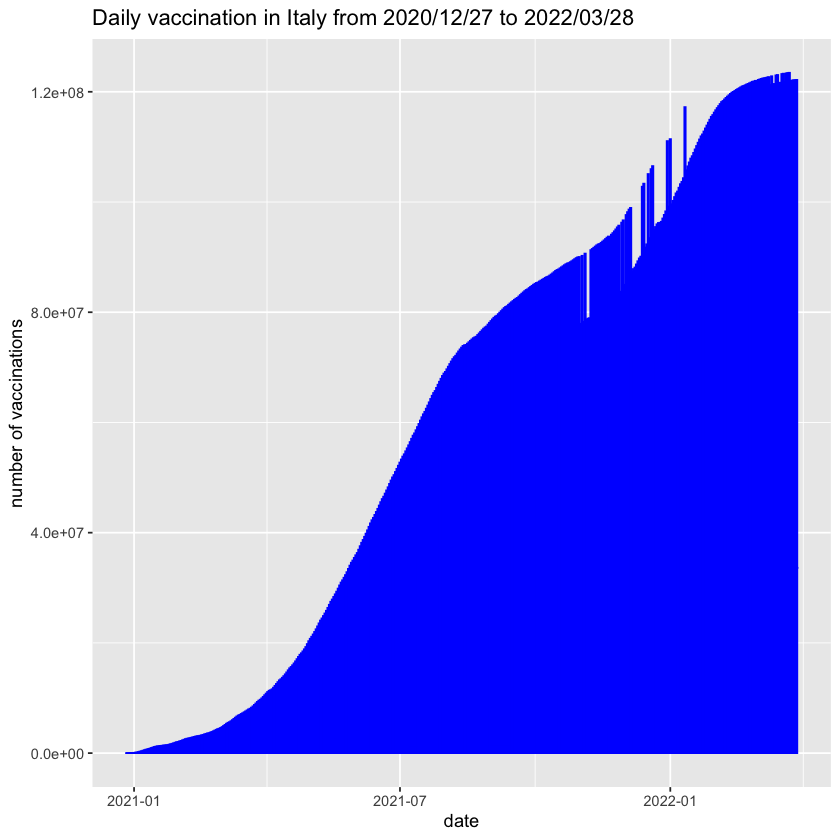

In [20]:
# c) From the same tibble plot the total number of vaccines shot per day in Italy:

ggplot(vax_ita,aes(date,total_vaccinations))+
    geom_bar(stat="identity", color="blue")+
    labs(title="Daily vaccination in Italy from 2020/12/27 to 2022/03/28",y="number of vaccinations")

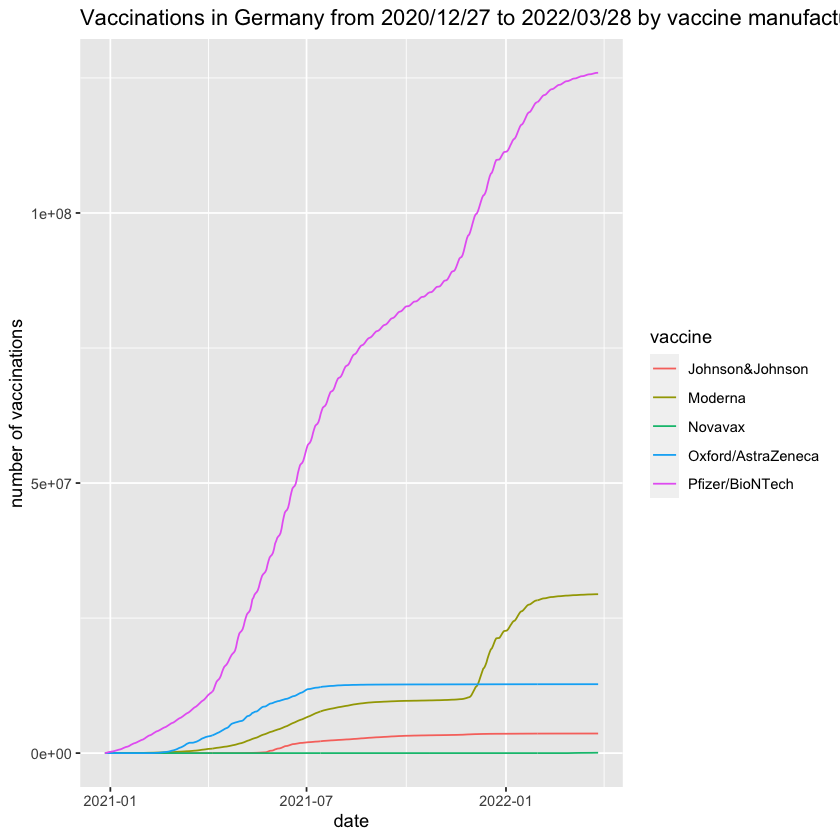

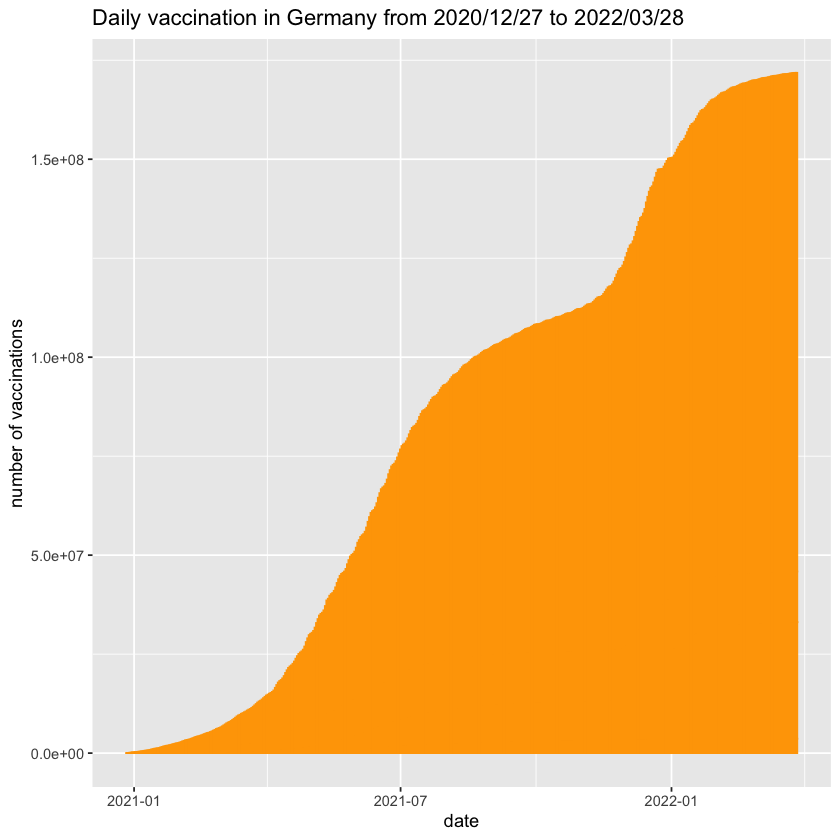

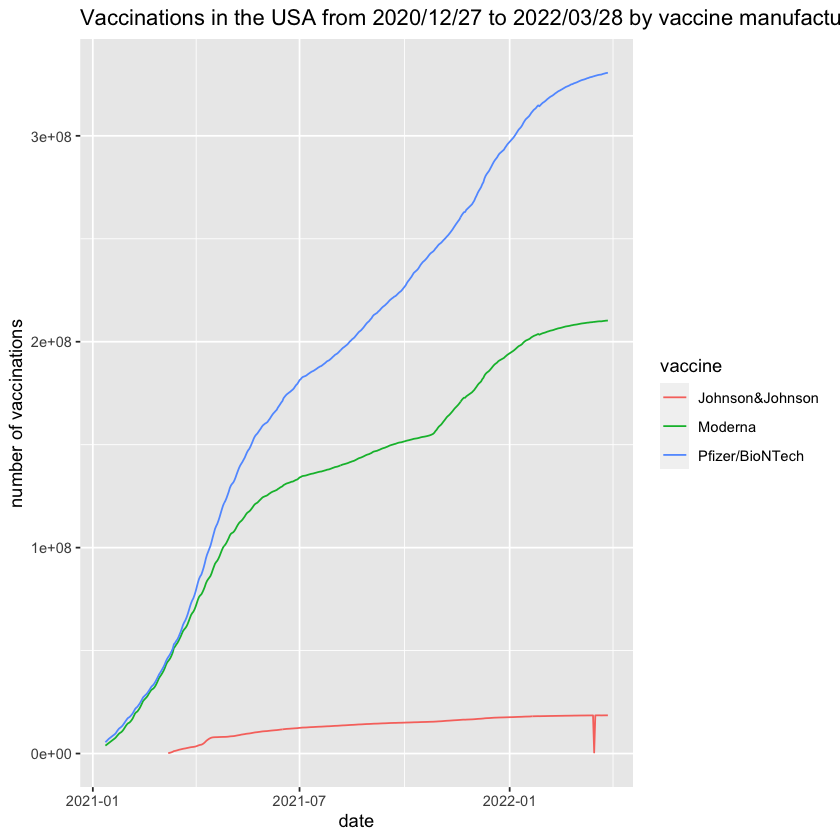

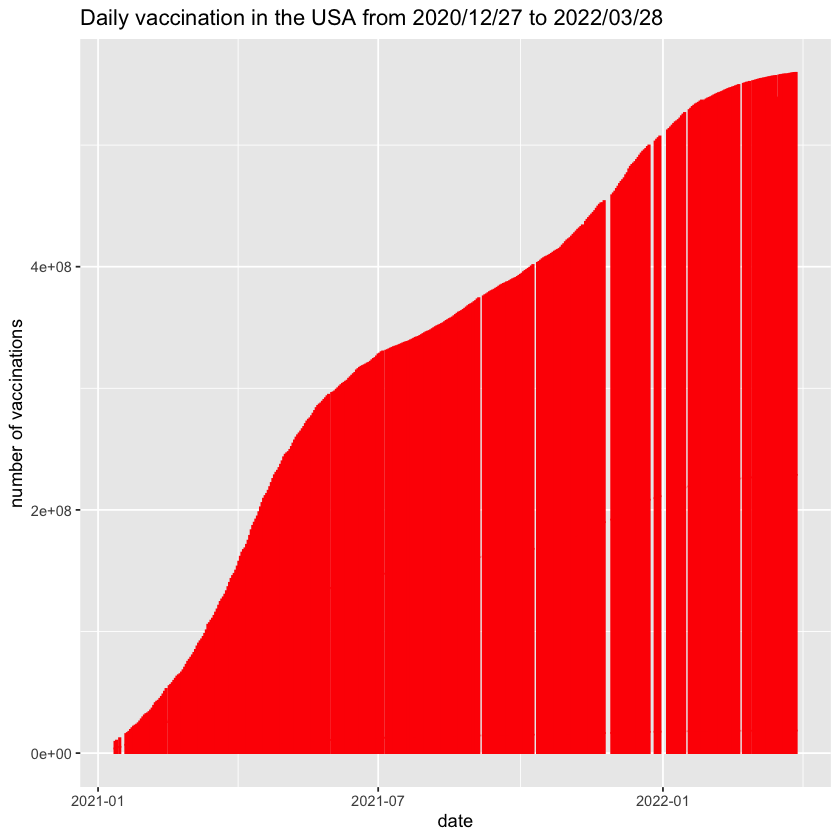

In [21]:
# d) Do the same exercise for the following countries: Germany and United States of America.

#Germany
vax_ger<-subset(Vax, location=="Germany")

vax_ger %>% group_by(vaccine) %>% 
  ggplot()+geom_line(aes(date, total_vaccinations, group=vaccine, color=vaccine))+
    labs(title="Vaccinations in Germany from 2020/12/27 to 2022/03/28 by vaccine manufacturer",y="number of vaccinations")

ggplot(vax_ger,aes(date,total_vaccinations))+
    geom_bar(stat="identity", color="orange")+
    labs(title="Daily vaccination in Germany from 2020/12/27 to 2022/03/28",y="number of vaccinations")

#USA
vax_usa<-subset(Vax, location=="United States")

vax_usa %>% group_by(vaccine) %>% 
    ggplot()+geom_line(aes(date, total_vaccinations, group=vaccine, color=vaccine))+
    labs(title="Vaccinations in the USA from 2020/12/27 to 2022/03/28 by vaccine manufacturer",y="number of vaccinations")

ggplot(vax_usa,aes(date,total_vaccinations))+
    geom_bar(stat="identity", color="red")+
    labs(title="Daily vaccination in the USA from 2020/12/27 to 2022/03/28",y="number of vaccinations")


Warning message:
“Removed 36 rows containing missing values (position_stack).”


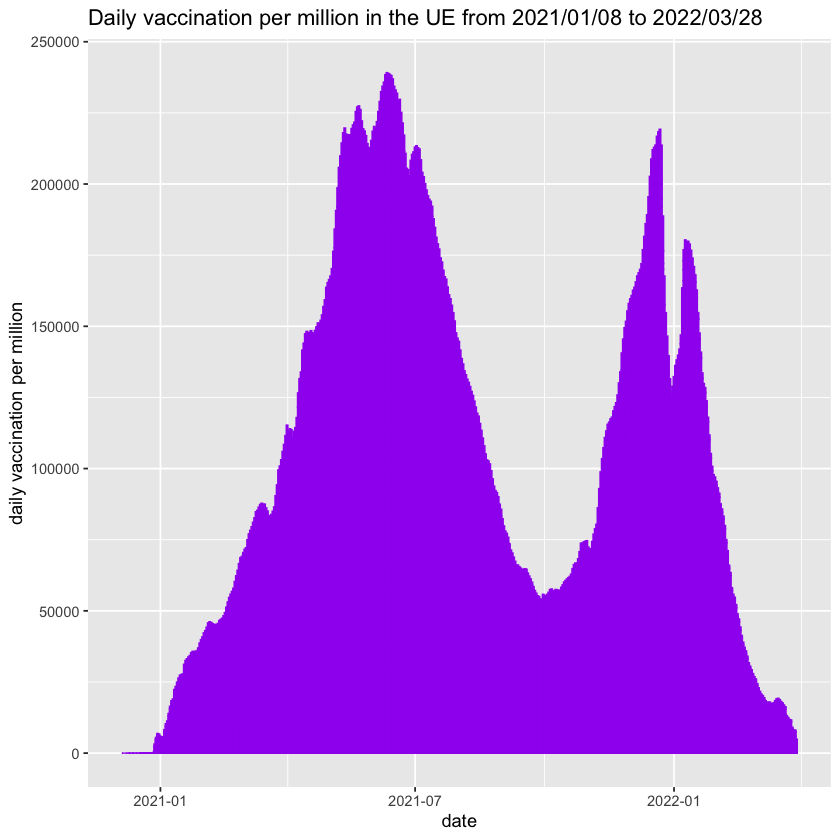

In [22]:
# e) Selecting all the European countries in the tibble, plot the number of daily vaccinations per million as a function of date.

europeanUnion <- c("Austria","Belgium","Bulgaria","Croatia","Cyprus",
                   "Czechia","Denmark","Estonia","Finland","France",
                   "Germany","Greece","Hungary","Ireland","Italy","Latvia",
                   "Lithuania","Luxembourg","Malta","Netherlands","Poland",
                   "Portugal","Romania","Slovakia","Slovenia","Spain",
                   "Sweden","United Kingdom")

Vax_global<-read.csv("vaccinations.csv",header=T)
Vax_global<-mutate(Vax_global, date=as.Date(date, format="%Y-%m-%d")) 

vax_eu<-filter(Vax_global,location %in% europeanUnion)


ggplot(vax_eu,aes(date,daily_vaccinations_per_million))+
    geom_bar(stat="identity", color="purple")+
    labs(title="Daily vaccination per million in the UE from 2021/01/08 to 2022/03/28",y="daily vaccination per million")


In [23]:
# f) Study the data structure and produce few relevant plots of your taste.

head(vax_eu,5)
tail(vax_eu,5)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Austria,AUT,2021-01-08,31660,31660,1,NA,NA,NA,0.35,0.35,0,NA,NA,NA,NA
2,Austria,AUT,2021-01-09,NA,NA,NA,NA,NA,12234,NA,NA,NA,NA,1353,12176,0.135
3,Austria,AUT,2021-01-10,NA,NA,NA,NA,NA,12234,NA,NA,NA,NA,1353,12176,0.135
4,Austria,AUT,2021-01-11,NA,NA,NA,NA,NA,12234,NA,NA,NA,NA,1353,12176,0.135
5,Austria,AUT,2021-01-12,NA,NA,NA,NA,NA,12234,NA,NA,NA,NA,1353,12176,0.135


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
12663,United Kingdom,GBR,2022-03-24,140830644,52759213,49352885,38718546,33618,34110,206.48,77.35,72.36,56.77,500,4793,0.007
12664,United Kingdom,GBR,2022-03-25,140867776,52764899,49366211,38736666,37132,33823,206.53,77.36,72.38,56.79,496,4985,0.007
12665,United Kingdom,GBR,2022-03-26,140914631,52775615,49385014,38754002,46855,33398,206.60,77.38,72.40,56.82,490,5054,0.007
12666,United Kingdom,GBR,2022-03-27,140937817,52783242,49393056,38761519,23186,32769,206.63,77.39,72.42,56.83,480,5142,0.008
12667,United Kingdom,GBR,2022-03-28,140968337,52788065,49404026,38776246,30520,32275,206.68,77.39,72.43,56.85,473,5188,0.008


Warning message:
“Removed 8 row(s) containing missing values (geom_path).”
Warning message:
“Removed 362 row(s) containing missing values (geom_path).”


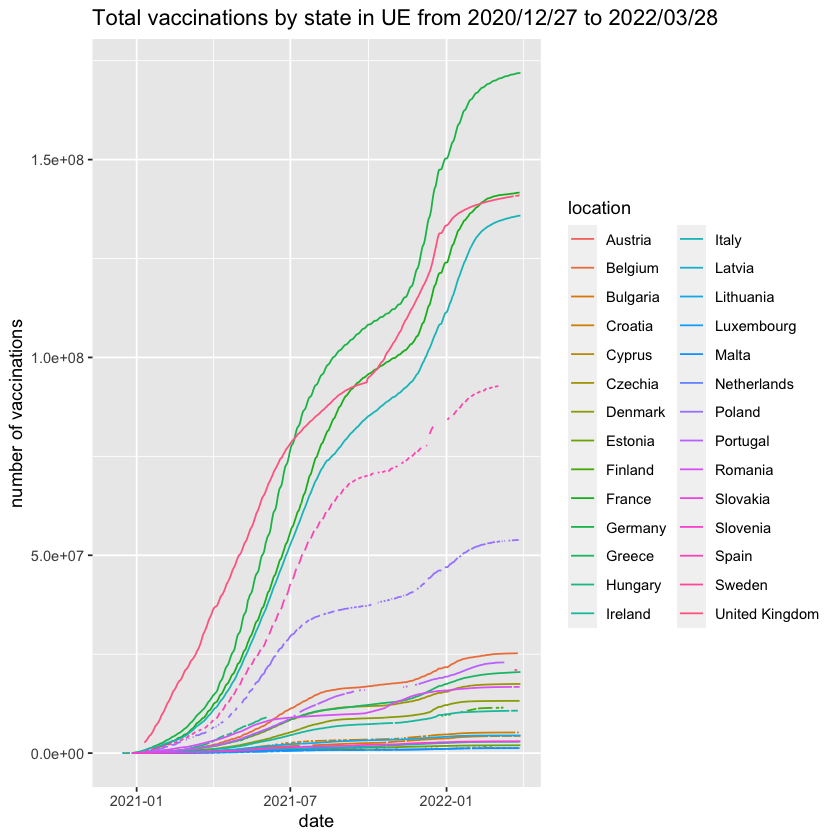

Warning message:
“Removed 2909 rows containing missing values (position_stack).”
Warning message:
“Removed 3379 rows containing missing values (position_stack).”


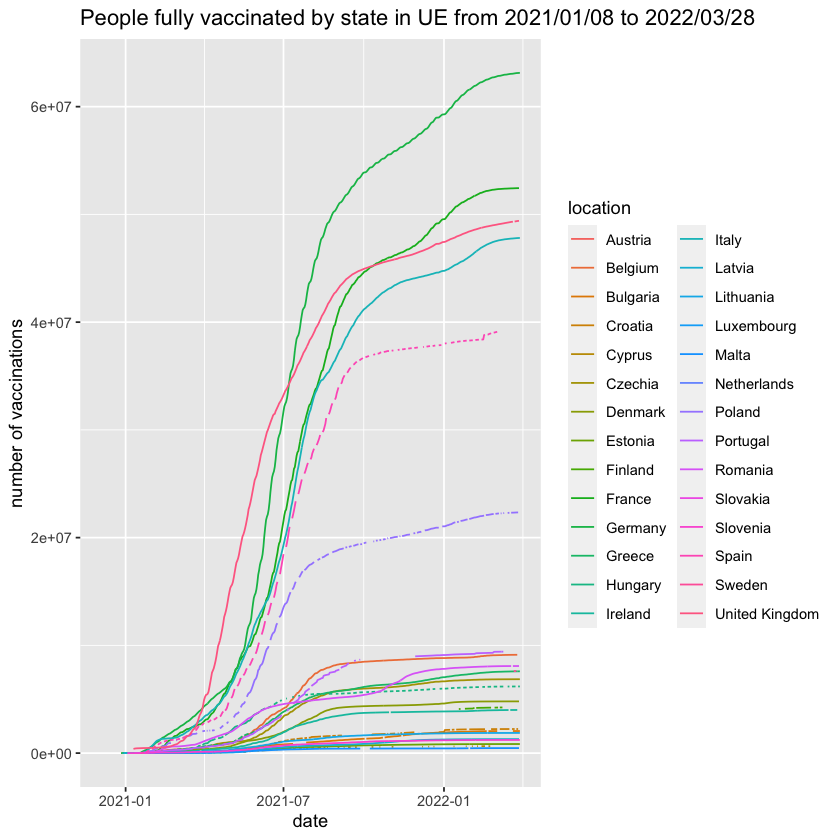

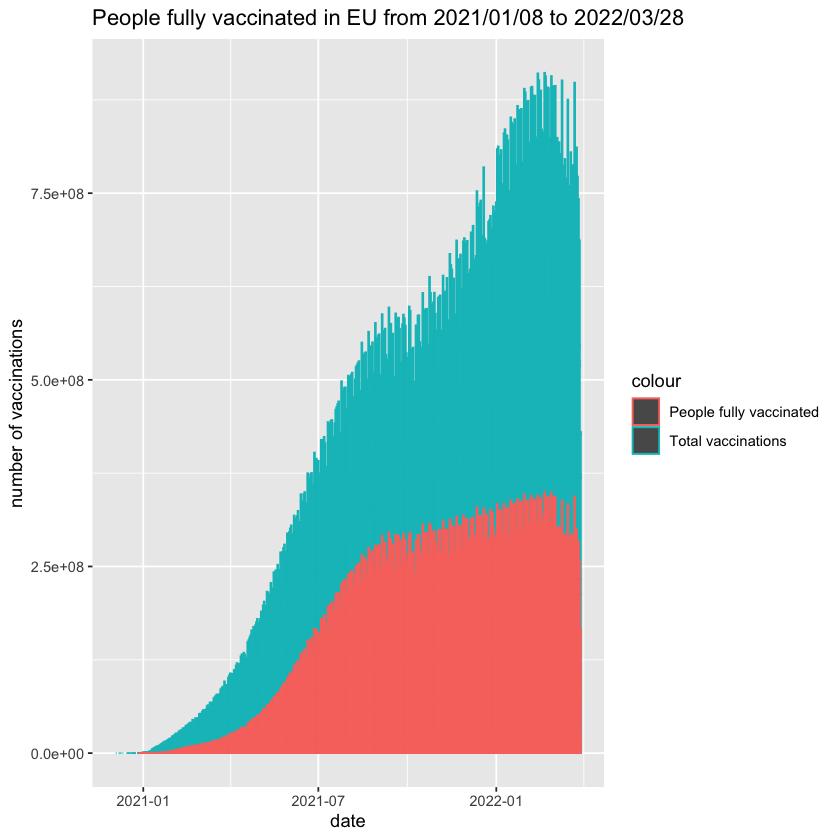

In [24]:
#some relevant plots:

vax_eu %>% group_by(location) %>% 
    ggplot()+geom_line(aes(date, total_vaccinations, group=location, color=location))+
    labs(title="Total vaccinations by state in UE from 2020/12/27 to 2022/03/28",y="number of vaccinations")

vax_eu %>% group_by(location) %>% 
    ggplot()+geom_line(aes(date, people_fully_vaccinated, group=location, color=location))+
    labs(title="People fully vaccinated by state in UE from 2021/01/08 to 2022/03/28",y="number of vaccinations")

ggplot(vax_eu,aes(x=date,y=total_vaccinations,color="Total vaccinations"))+
    geom_bar(stat="identity")+
    geom_bar(data= vax_eu, aes(y=people_fully_vaccinated,color="People fully vaccinated"), stat="identity")+
    labs(title="People fully vaccinated in EU from 2021/01/08 to 2022/03/28",y="number of vaccinations")

### References

[1] Lakes of Scotland: https://en.wikipedia.org/wiki/List_of_lochs_of_Scotland

[2] Global crude oil prices, measured in US dollars per barrel: https://ourworldindata.org/grapher/
crude-oil-prices

[3] World’s coal production https://ourworldindata.org/grapher/coal-production-by-country

[4] Tibble: Simple Data Frames https://cran.r-project.org/web/packages/tibble/index.html

[5] Data on COVID-19 (coronavirus) vaccinations by Our World in Data: https://github.com/owid/ covid-19-data/tree/master/public/data/vaccinations